# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/4

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [17]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정
UTILS = "/content/resources/utils"   # git clone 경로
FIGS  = os.path.join(BASE, "figures")
os.makedirs(FIGS, exist_ok=True)

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [18]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


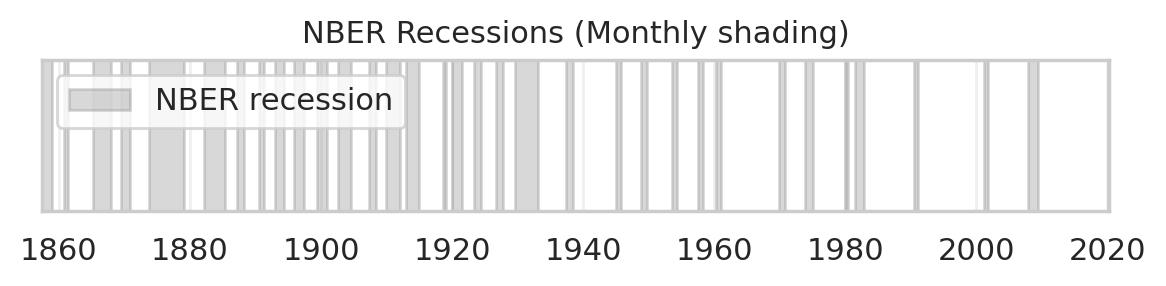

In [19]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

In [20]:
plot_nber_recession

<function nber_utils.plot_nber_recession(ax, nber_df, color='gray', alpha=0.3, label='_nolegend_', clip_to_xlim=False, keep_xlim=True)>

# Main

## 비은행금융기관 규모

In [4]:
!pip -q install xlrd
!pip -q install openpyxl

In [13]:
filename = '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/Underlying-data-for-graphs-2022.xlsx'

df_nbfi = pd.read_excel(filename, sheet_name='Graph 1-1 LHS', header=3)
df_nbfi = df_nbfi.iloc[0:19,:]
df_nbfi.columns = ['year', 'NBFI 비중', 'NBFI','은행','중앙은행','공공 금융기관']
df_nbfi.set_index('year', inplace=True)
df_nbfi.head(3)

,NBFI 비중,NBFI,은행,중앙은행,공공 금융기관
year,,,,,
2002-12-31,41.536,49.918,54.183,4.774,11.305
2003-12-31,46.009,62.557,56.798,5.130,11.482
2004-12-31,46.653,69.856,62.714,5.785,11.379


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/NBFI.png


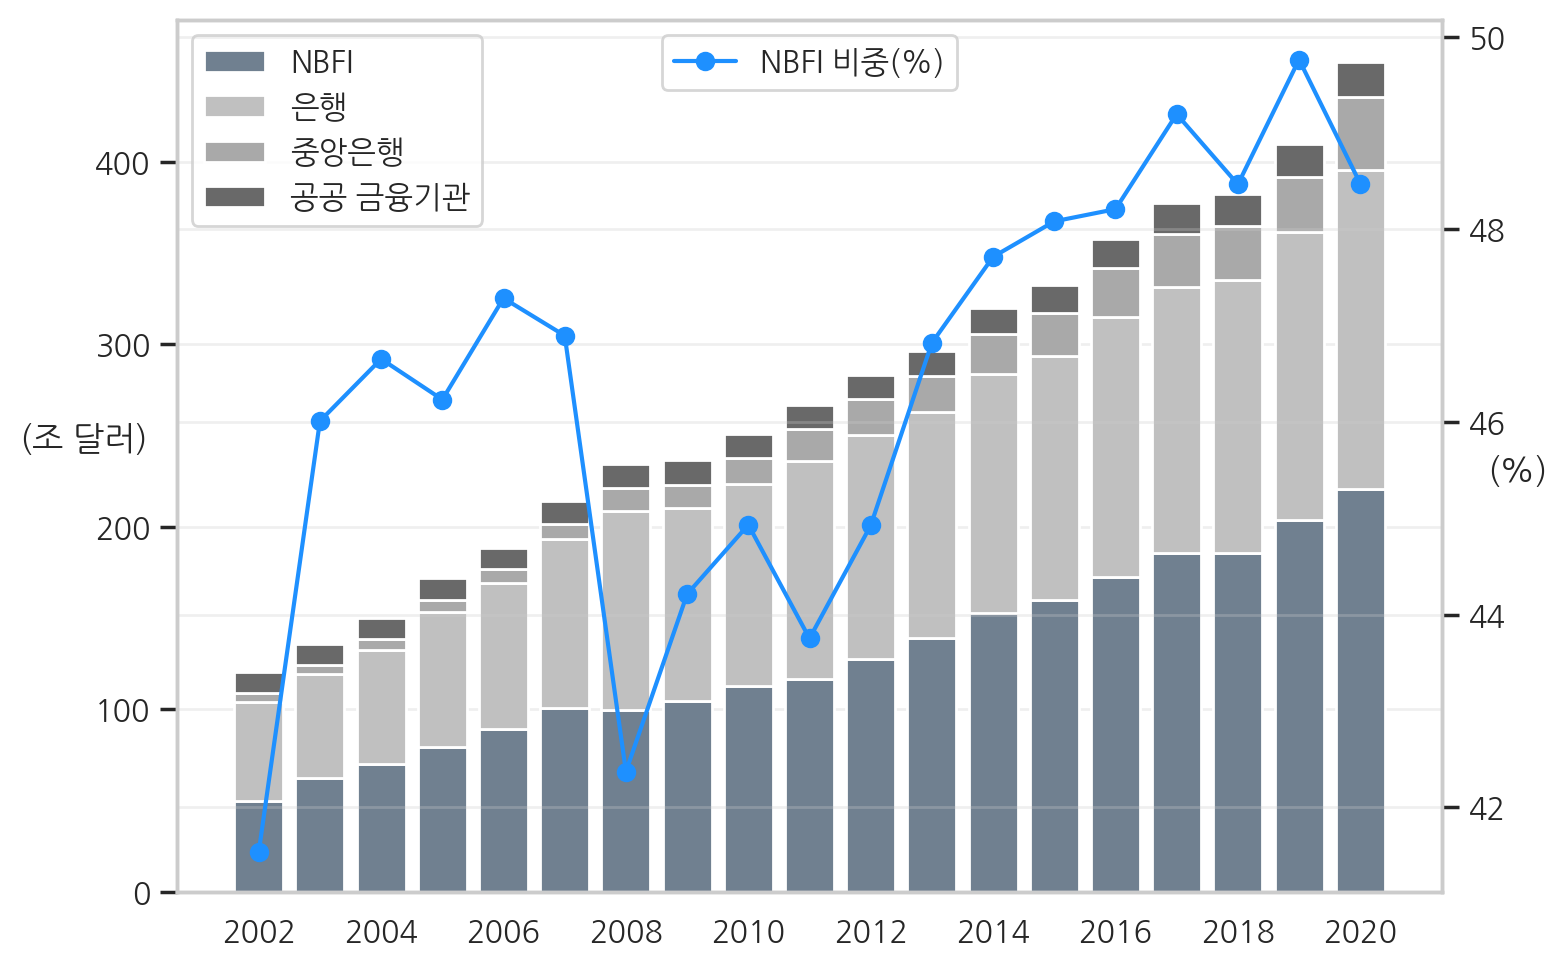

In [14]:
# stacked bar graph

fig, ax = plt.subplots()

# x = df_nbfi.index is not working
x = np.arange(2002,2021)

ax.bar(x, df_nbfi['NBFI'], label='NBFI',color='slategrey')
ax.bar(x, df_nbfi['은행'], bottom = df_nbfi['NBFI'], label='은행',color='silver')
ax.bar(x, df_nbfi['중앙은행'], bottom = df_nbfi['은행']+df_nbfi['NBFI'], label='중앙은행', color='darkgrey')
ax.bar(x, df_nbfi['공공 금융기관'], bottom = df_nbfi['중앙은행']+df_nbfi['은행']+df_nbfi['NBFI'], label='공공 금융기관',color='dimgrey')

'''
hatches = ['/', '\\', 'x','.']  # Different patterns
ax.bar(x, df_nbfi['NBFI'], label='NBFI',color='white', edgecolor='black', hatch=hatches[0])
ax.bar(x, df_nbfi['은행'], bottom = df_nbfi['NBFI'], label='은행',color='white', edgecolor='black', hatch=hatches[1])
ax.bar(x, df_nbfi['중앙은행'], bottom = df_nbfi['은행']+df_nbfi['NBFI'], label='중앙은행',color='white', edgecolor='black', hatch=hatches[2])
ax.bar(x, df_nbfi['공공 금융기관'], bottom = df_nbfi['중앙은행']+df_nbfi['은행']+df_nbfi['NBFI'], label='공공 금융기관',color='white', edgecolor='black', hatch=hatches[3])
'''

xtick_labels = [i if i % 2 == 0 else '' for i in x]
ax.set_xticks(x)
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('(조 달러)', rotation=0)

ax.legend()
ax.grid(axis='x')

ax1 = ax.twinx()

# NBFI 비중
ax1.plot(x, df_nbfi['NBFI 비중'], marker='o', color='dodgerblue', label='NBFI 비중(%)')
ax1.set_ylabel('(%)',rotation=0)
ax1.legend(loc='upper center')

save_fig('NBFI')

plt.show()

## MMF

In [23]:
# import total assets, equity

var_list = ['MMMFFAQ027S']
start = datetime(1965,1,1)
end = datetime(2024,7,31)

df_mmf = pdr.get_data_fred(var_list, start=start, end=end)
df_mmf.columns = ['MMF']
df_mmf = df_mmf/1000

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/MMF.png


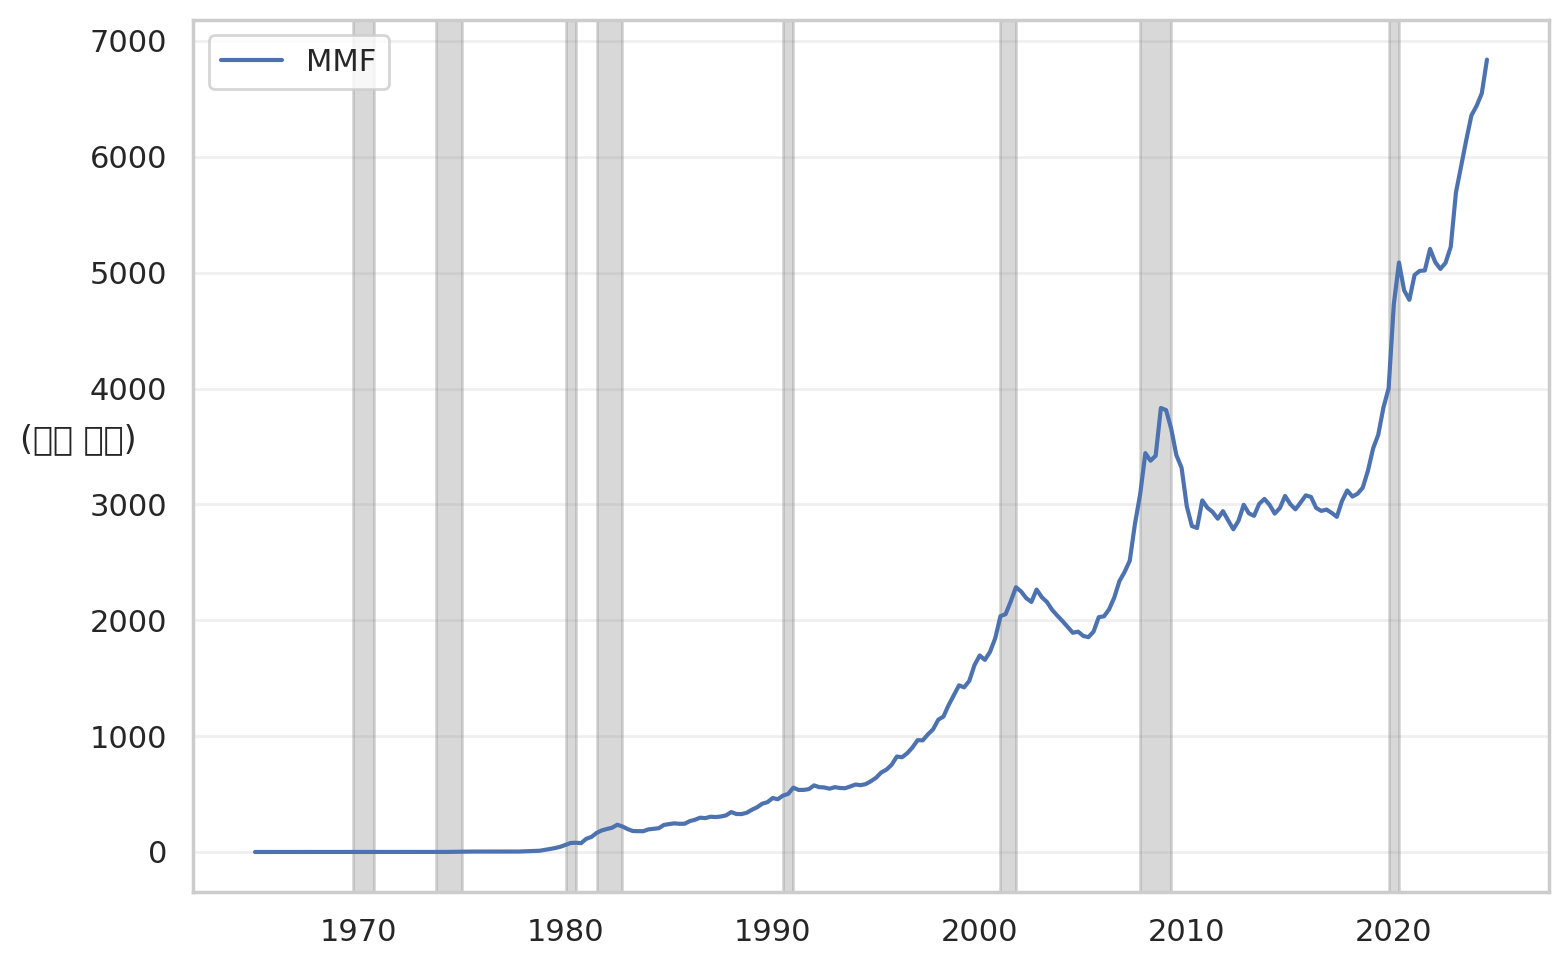

In [24]:
start_year = '1965'
end_year = '2024'

fig, ax = plt.subplots()

ax.plot(df_mmf[['MMF']], linestyle='solid',label='MMF')
plot_nber_recession(ax, NBERq)

ax.legend()
ax.set_xlabel('')
ax.set_ylabel('(십억 달러)', rotation=0)

ax.grid(axis='x')
save_fig('MMF')

plt.show()